# Kaggle - titanic

https://www.kaggle.com/c/titanic


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load dataset

In [2]:
test_df = pd.read_csv("test.csv")  #생존여부 나와있지 않음
train_df = pd.read_csv("train.csv")  #생존여부 나와있음

In [3]:
train_df.head(1)  #survived가 있음

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [4]:
test_df.head(1)  #survived가 없음

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


In [5]:
# PassengerId를 인덱스로 만들어줌
train_df.set_index('PassengerId', inplace=True)
test_df.set_index('PassengerId', inplace=True) 

In [6]:
train_df.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [7]:
test_df.head(1)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


In [8]:
# 나중을 위해 각각의 처음 인덱스값을 뽑아줌
train_index = train_df.index
test_index = test_df.index

In [9]:
# 결과에 해당하는 y 데이터를 뽑아냄
y_train_df = train_df.pop("Survived")

In [10]:
y_train_df.head(3)

PassengerId
1    0
2    1
3    1
Name: Survived, dtype: int64

### Data preprocessing

In [11]:
#소수점 두자리까지만 표현하도록
pd.set_option('display.float_format', lambda x : '%.2f' % x)

In [12]:
#결측치 찾아내기
test_df.isnull().sum() / len(test_df)

Pclass     0.00
Name       0.00
Sex        0.00
Age        0.21
SibSp      0.00
Parch      0.00
Ticket     0.00
Fare       0.00
Cabin      0.78
Embarked   0.00
dtype: float64

In [13]:
train_df.isnull().sum() / len(train_df) * 100

Pclass      0.00
Name        0.00
Sex         0.00
Age        19.87
SibSp       0.00
Parch       0.00
Ticket      0.00
Fare        0.00
Cabin      77.10
Embarked    0.22
dtype: float64

### Decision making

In [14]:
# Cabin의 결측치 약 77% -> drop해버리기
# Cabin에서도 다양한 정보를 추출할 수 있지만 우리는 귀찮으니 drop할것
del test_df["Cabin"]
del train_df["Cabin"]

In [15]:
#전처리 할 때는 같은 방식으로 해주어야함
#train을 전처리해주는 방식 그대로 test도 전처리
all_df = train_df.append(test_df)
all_df 

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C
3,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,S
5,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,S
...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,nan,0,0,A.5. 3236,8.05,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00,0,0,PC 17758,108.90,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.50,0,0,SOTON/O.Q. 3101262,7.25,S


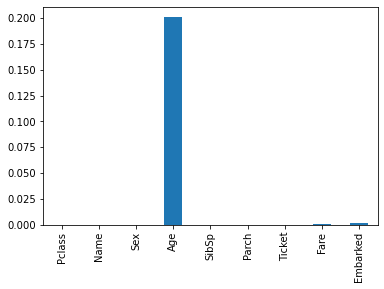

In [16]:
#데이터가 얼마나 결측치가 있는지 확인해보기
(all_df.isnull().sum() / len(all_df)).plot(kind='bar')
plt.show()

In [17]:
len(all_df)

1309

In [18]:
del all_df["Name"]  #실제로 Name에는 정보들이 담겨있지만 일단 오늘은 패스

In [19]:
del all_df["Ticket"]  #Ticket도 패스해서 간소화

***

In [20]:
all_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,male,22.00,1,0,7.25,S
2,1,female,38.00,1,0,71.28,C
3,3,female,26.00,0,0,7.92,S
4,1,female,35.00,1,0,53.10,S
5,3,male,35.00,0,0,8.05,S


In [21]:
# Sex를 One-Hot Encoding (0,1로 바꿔줌)
all_df["Sex"] = all_df["Sex"].replace({"male":0, "female":1})

***

In [22]:
all_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,0,22.00,1,0,7.25,S
2,1,1,38.00,1,0,71.28,C
3,3,1,26.00,0,0,7.92,S
4,1,1,35.00,1,0,53.10,S
5,3,0,35.00,0,0,8.05,S


In [23]:
all_df["Embarked"].unique() #embarked : 어느 항구에서 출발했냐

array(['S', 'C', 'Q', nan], dtype=object)

In [24]:
# "Embarked" One-Hot Encoding (없는 값은 99로 만들어줌)
all_df["Embarked"] = all_df["Embarked"].replace({"S":0, "C":1, "Q":2, np.nan:99})

In [25]:
all_df["Embarked"].unique()

array([ 0,  1,  2, 99], dtype=int64)

In [26]:
all_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,0,22.00,1,0,7.25,0
2,1,1,38.00,1,0,71.28,1
3,3,1,26.00,0,0,7.92,0
4,1,1,35.00,1,0,53.10,0
5,3,0,35.00,0,0,8.05,0


In [27]:
pd.get_dummies(all_df["Embarked"], prefix="embarked")

,embarked_0,embarked_1,embarked_2,embarked_99
PassengerId,,,,
1,1,0,0,0
2,0,1,0,0
3,1,0,0,0
4,1,0,0,0
5,1,0,0,0
...,...,...,...,...
1305,1,0,0,0
1306,0,1,0,0
1307,1,0,0,0


In [28]:
matrix_df = pd.merge(
    all_df, pd.get_dummies(all_df["Embarked"], prefix="embarked"),
    left_index=True, right_index=True)
matrix_df.head()
# 우리 레벨에서는 embarked부분 빼는 게 더 점수가 잘 나온다고 함ㅋㅋㅋ 조금 뒤에 del할것

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,embarked_0,embarked_1,embarked_2,embarked_99
PassengerId,,,,,,,,,,,
1,3,0,22.00,1,0,7.25,0,1,0,0,0
2,1,1,38.00,1,0,71.28,1,0,1,0,0
3,3,1,26.00,0,0,7.92,0,1,0,0,0
4,1,1,35.00,1,0,53.10,0,1,0,0,0
5,3,0,35.00,0,0,8.05,0,1,0,0,0


***

In [29]:
# 상관관계 확인해보기
# linear regression에서는 상관관계가 너무 큰 건 없애주는게 맞음
# 이 문제에서는 확인만 해보기
matrix_df.corr()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,embarked_0,embarked_1,embarked_2,embarked_99
Pclass,1.00,-0.12,-0.41,0.06,0.02,-0.56,-0.05,0.10,-0.27,0.23,-0.06
Sex,-0.12,1.00,-0.06,0.11,0.21,0.19,0.07,-0.12,0.07,0.09,0.05
Age,-0.41,-0.06,1.00,-0.24,-0.15,0.18,0.07,-0.08,0.09,-0.02,0.06
SibSp,0.06,0.11,-0.24,1.00,0.37,0.16,-0.03,0.08,-0.05,-0.05,-0.02
Parch,0.02,0.21,-0.15,0.37,1.00,0.22,-0.03,0.07,-0.01,-0.10,-0.02
Fare,-0.56,0.19,0.18,0.16,0.22,1.00,0.05,-0.17,0.29,-0.13,0.04
Embarked,-0.05,0.07,0.07,-0.03,-0.03,0.05,1.00,-0.21,0.06,0.12,0.99
embarked_0,0.10,-0.12,-0.08,0.08,0.07,-0.17,-0.21,1.00,-0.78,-0.49,-0.06
embarked_1,-0.27,0.07,0.09,-0.05,-0.01,0.29,0.06,-0.78,1.00,-0.16,-0.02
embarked_2,0.23,0.09,-0.02,-0.05,-0.10,-0.13,0.12,-0.49,-0.16,1.00,-0.01


In [30]:
all_df.groupby("Pclass")["Age"].mean()

Pclass
1   39.16
2   29.51
3   24.82
Name: Age, dtype: float64

In [31]:
all_df.groupby("Sex")["Age"].mean()

Sex
0   30.59
1   28.69
Name: Age, dtype: float64

In [32]:
#all_df.loc[] :: "Age"가 20% 비어있으니 채워주기 !

#groupby했을 때, "Sex"보다는 "Pclass"가 더 직관적임
#ex) 1등석 탄사람이 나이가 제일 많고.. 돈많은 사람이 나이가 많을 것이다..등등
all_df.loc[(all_df["Pclass"]==1) & (all_df["Age"].isnull()), "Age"]

PassengerId
32     nan
56     nan
65     nan
167    nan
169    nan
186    nan
257    nan
271    nan
285    nan
296    nan
299    nan
307    nan
335    nan
352    nan
376    nan
458    nan
476    nan
508    nan
528    nan
558    nan
603    nan
634    nan
670    nan
712    nan
741    nan
767    nan
794    nan
816    nan
840    nan
850    nan
914    nan
933    nan
1038   nan
1040   nan
1060   nan
1083   nan
1097   nan
1158   nan
1182   nan
Name: Age, dtype: float64

In [33]:
all_df.loc[(all_df["Pclass"] == 1) & (
        all_df["Age"].isnull()), "Age"] = 39.16
all_df.loc[ (
    all_df["Pclass"] == 2) & all_df["Age"].isnull() , "Age"] = 29.51
all_df.loc[ ( all_df["Pclass"] == 3) & all_df["Age"].isnull(), "Age"] = 24.82

***

In [34]:
all_df.isnull().sum()  #Fare에서 하나가 비어있음

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [35]:
all_df[all_df["Fare"].isnull()]  

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1044,3,0,60.50,0,0,nan,0


In [36]:
all_df.loc[all_df["Fare"].isnull(), "Fare"] = 13.30  #평균값으로 빈곳 채워줌

***

In [37]:
del all_df["Embarked"]  #embarked는 drop해버리자 이미 one-hot encoding 해줬으니

In [38]:
all_df["Pclass"] = all_df["Pclass"].replace({1:"A", 2:"B", 3:"C"})

In [39]:
all_df = pd.get_dummies(all_df)
all_df.head()

,Sex,Age,SibSp,Parch,Fare,Pclass_A,Pclass_B,Pclass_C
PassengerId,,,,,,,,
1,0,22.00,1,0,7.25,0,0,1
2,1,38.00,1,0,71.28,1,0,0
3,1,26.00,0,0,7.92,0,0,1
4,1,35.00,1,0,53.10,1,0,0
5,0,35.00,0,0,8.05,0,0,1


In [40]:
#merge를 이용해 하나의 matrix로 만들어주기
all_df = pd.merge(
    all_df, matrix_df[["embarked_0", "embarked_1", "embarked_2", "embarked_99"]], 
    left_index=True, right_index=True)

In [41]:
train_df = all_df[all_df.index.isin(train_index)]
test_df = all_df[all_df.index.isin(test_index)]

In [42]:
train_df.head(3)

,Sex,Age,SibSp,Parch,Fare,Pclass_A,Pclass_B,Pclass_C,embarked_0,embarked_1,embarked_2,embarked_99
PassengerId,,,,,,,,,,,,
1,0,22.00,1,0,7.25,0,0,1,1,0,0,0
2,1,38.00,1,0,71.28,1,0,0,0,1,0,0
3,1,26.00,0,0,7.92,0,0,1,1,0,0,0


In [43]:
test_df.head(3)

,Sex,Age,SibSp,Parch,Fare,Pclass_A,Pclass_B,Pclass_C,embarked_0,embarked_1,embarked_2,embarked_99
PassengerId,,,,,,,,,,,,
892,0,34.50,0,0,7.83,0,0,1,0,0,1,0
893,1,47.00,1,0,7.00,0,0,1,1,0,0,0
894,0,62.00,0,0,9.69,0,1,0,0,0,1,0


### 💾 Build Model

In [44]:
x_data = train_df.values
y_data = y_train_df.values

In [45]:
x_data.shape, y_data.shape

((891, 12), (891,))

In [46]:
y_data

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [47]:
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression()
cls.fit(x_data, y_data)

C:\Users\syj47\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
cls.intercept_

array([0.179959])

In [49]:
cls.coef_

array([[ 2.60637299e+00, -4.12454462e-02, -3.25963401e-01,
        -8.35556940e-02,  2.39797428e-03,  1.11334623e+00,
         1.45687628e-01, -1.09227310e+00, -2.11209744e-01,
         2.12940550e-01,  9.89063043e-02,  6.61236384e-02]])

In [50]:
cls.predict(test_df.values)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [51]:
test_df.index 

Int64Index([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,
            ...
            1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309],
           dtype='int64', name='PassengerId', length=418)

In [52]:
x_test = test_df.values
y_test = cls.predict(x_test)
y_test

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [53]:
result = np.concatenate( (test_index.values.reshape(-1,1),
                 cls.predict(x_test).reshape(-1,1)  ) , axis=1)
result[:5]

array([[892,   0],
       [893,   0],
       [894,   0],
       [895,   0],
       [896,   1]], dtype=int64)

In [54]:
df_submssion =pd.DataFrame(result, columns=["PassengerId","Survived"])
df_submssion

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [55]:
df_submssion.to_csv("submission_result.csv",index=False)  #제출할 csv파일